# MECANISMO CUATRO BARRAS 

## PROBLEMAS VELOCIDAD Y ACELERACIÓN

### PASO 1: MATRIZ JACOBIANA 

Para resolver el problema velocidad, necesitamos otra vez la matriz jacobiana. El método de construcción aparece detallado en el notebook Problema_Posición_4B, por lo que para este caso copiaremos el código de los pasos realizados para poder conseguirla.

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["L4"] = float (input ('Introduce longitud L4: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input('Introduce angulo inicial beta: ')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [2], [0.1], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(X3-X2)
    Jacob[2,3] = -2*(Y3-Y2)
    Jacob[2,4] = 2*(X3-X2)
    Jacob[2,5] = 2*(Y3-Y2)
    Jacob[3,4] = -2*(meca["XB"]-X3)
    Jacob[3,5] = -2*(meca["YB"]-Y3)

    if (math.cos(theta) < (math.sqrt(2)/2) ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if (math.cos(beta) < (math.sqrt(2)/2) ):
        Jacob[5,7] = meca["L4"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L4"]*math.cos(beta)
        Jacob[5,5] = 1

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
	
    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X3-X2)**2 + (Y3-Y2)**2 - meca["L3"]**2
    Phi[3] = (meca["XB"] - X3)**2 + (meca["YB"] - Y3)**2 - meca["L4"]**2

    if (math.cos(theta) < (math.sqrt(2)/2) ):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)
		
    if (math.cos(beta) < (math.sqrt(2)/2) ):
        Phi[5] = (X3-meca["XB"])-meca["L4"]*math.cos(beta)
    else: 
        Phi[5] = Y3-meca["L4"]*math.sin(beta)
		
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):



        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

    return q


J = jacob_Phiq(q,meca)
print ("Jacob=")
pprint.pprint(J)

MECANISMO DE CUATRO BARRAS
Introduce longitud L1:1
Introduce longitud L2:1
Introduce longitud L3:1
Introduce longitud L4: 1
Introduce angulo inicial theta:0.2
Introduce angulo inicial beta: 1
Introduce coordenada en x del punto B:5
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [2. ]
 [0.1]
 [0.2]
 [1. ]]
Jacob=
array([[ 0.2       ,  2.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.8       ,  1.6       ,  1.8       , -1.6       ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -2.        ,  0.2       ,  2.        ,
        -0.2       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -6.        ,
         0.2       ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.98006658,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0

### PASO 2: PROBLEMA VELOCIDAD

Consiste en determinar las velocidades de todas las variables del mecanismo una vez sabemos su posición $q$ y la velocidad de los grados de libertad. 

Partimos de la ecuación:

#Фq · q_p = -Ф_p$

Siendo $q_p$ el vector velocidad, $Фq$ el jacobiano y $Ф_p$ la derivada parcial de las ecuaciones de restricción respecto al tiempo. Para las ecuaciones de sólido rígido el valor de esta derivada es $0$. Solo tendría un valor no nulo la correspondiente al ángulo, que en ese caso tendría la velocidad que nosotros le indiquemos. 

En este caso vamos a tomar un valor de $1$. 

Por lo tanto, tendríamos:

$q_p = Фq/Ф_p$

In [2]:
# PASO 2

def resuelve_prob_velocidad(q,meca):
    
    b = np.zeros ((8,1))
    #Velocidad del gdl.
    b[6]=0.2
    b[7] = 0.2
    qp = np.linalg.solve(jacob_Phiq(q,meca),b)
 
    return qp
	
resuelve_prob_velocidad (q,meca)

array([[-1.96013316],
       [ 0.19601332],
       [ 0.64980812],
       [ 3.13219725],
       [-0.1682942 ],
       [-5.04882591],
       [ 0.2       ],
       [ 0.2       ]])

### PASO 3: PROBLEMA ACELERACIÓN

El problema aceleración trata de determinar las aceleraciones de todas las variables del mecanismo, conociendo la posición$q$, la velocidad $q_p$ y las aceleraciones de los grados de libertad. 

La ecuación de la que partimos es:

$Фq · q_pp = -∂_Фq · q_p$

Siendo Фq el jacobiano, q_pp el vector aceleración, q_p el vector velocidad y ∂_Фq la derivada del jacobiano respecto al tiempo. 

Es decir, si llamamos &b& al conjunto $∂_Фq · q_p$ tendríamos como resultado:

$q_pp = -Фq/b$

El vector velocidad será:

\begin{equation}
\mathbf{q_p} = 
\begin{bmatrix}
X_1q \\
Y_1q \\
X_2q \\
Y_2q \\
X_3q \\
Y_3q \\
θ_q\\
\beta_q \\
\end{bmatrix}
\end{equation}

Por otro lado, para calcular la derivada del jacobiano solo tenemos en cuenta las filas que hacen referencia a las ecuaciones de las coordenadas independientes, ya que la última que añadimos para poder realizar los cálculos era adicional. Teniendo en cuenta esto, la derivada del jacobiano sería:

¡¡¡¡ COMPLETAR !!!!

Como ya tenemos $∂_Фq$ y $q_p$, podemos calcular &b&. La última fila que añadimos es el valor de la aceleración angular, dato que sabemos de antemano. 

In [3]:
def resuelve_prob_aceleracion (q,meca):

    b=np.zeros ((8,1))
    qp = resuelve_prob_velocidad (q,meca)
	
	#Extraer las posiciones
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    #Extraer las velocidades
    X1q = qp[0]
    Y1q = qp[1]
    X2q = qp[2]
    Y2q = qp[3]
    X3q = qp[4]
    Y3q = qp[5]
    thetaq = qp[6]
    betaq = qp[7]
    
    b[0] = 2*(X1q)**2 + 2*(Y1q)**2
    b[1] = -2*X1q*(X2q-X1q) - 2*Y1q*(Y2q-Y1q) + 2*X2q*(X2q*X1q) + 2*Y2q*(Y2q*Y1q)
    b[2] = -2*X2q*(X3q-X2q) + 2*Y2q*Y3q + 2*X3q*(X3q-X2q) + 2*Y3q*(Y3q-Y2q)
    b[3] = -2*X3q**2 - 2*Y3q**2
    
    if (math.cos(theta) < (math.sqrt(2)/2) ):
        b[4] = thetaq**2 * (meca["L1"] * math.cos(theta))
    else: 
        b[4] =  thetaq**2 * (meca["L1"] * math.sin(theta))
    
    if (math.cos(beta) < (math.sqrt(2)/2) ):
        b[5] = betaq**2 * (meca["L4"] * math.cos(beta))
    else: 
        b[5] =  betaq**2 * (meca["L4"] * math.sin(beta))
		
    b[6] = 1 #Aceleracion conocida 
    b[7] = 1
    qpp = np.linalg.solve(-jacob_Phiq(q,meca),b)

     
    return qpp

resuelve_prob_aceleracion(q, meca)

array([[-28.92529857],
       [ -0.98801335],
       [  3.2236644 ],
       [ 42.22413726],
       [  0.81985889],
       [279.78542672],
       [ -1.        ],
       [ -1.        ]])

VX1=
array([-2.        , -1.98357995, -1.93458942, -1.85383284, -1.74263623,
       -1.60282545, -1.4366962 , -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487, -0.12964481,
       -0.10910598, -0.08677561, -0.06302039, -0.03823037, -0.01281261,
        0.01281554,  0.03823326,  0.06302318,  0.08677826,  0.10910844,
        0.12964705,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -1.43671664, -1.60284303,
       -1.74265065, -1.85384387, -1.93459688, -1.98358371, -2.        ])


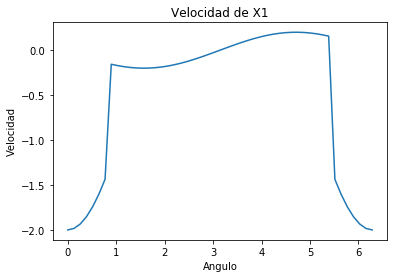

In [4]:
#PASO 4: VELOCIDAD DE X1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX1 = np.append(VX1, qp[0])

        i=i+1
      
    print ("VX1=")
    pprint.pprint(VX1)
 
    plt.plot(th,VX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY1=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962,  0.01563666,  0.01710288,  0.01828827,
        0.01917337,  0.01974365,  0.01998973,  0.01990757,  0.01949854,
        0.01876934,  0.01773194,  0.01640339,  0.01480549,  0.01296448,
        0.0109106 ,  0.00867756,  0.00630204,  0.00382304,  0.00128126,
       -0.00128155, -0.00382333, -0.00630232, -0.00867783, -0.01091084,
       -0.0129647 , -0.01480568, -0.01640355, -0.01773208, -0.01876944,
       -0.0194986 , -0.0199076 , -0.01998972, -0.0197436 , -0.01917329,
       -0.01828816, -0.01710273, -0.01563647,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


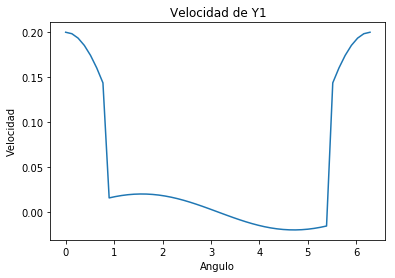

In [7]:
#PASO 5: VELOCIDAD DE Y1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY1 = np.append(VY1, qp[1])

        i=i+1
      
    print ("VY1=")
    pprint.pprint(VY1)
 
    plt.plot(th,VY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX2=
array([ 0.26103286,  0.25888978,  0.25249571,  0.24195565,  0.22744266,
        0.20919506,  0.18751246,  0.37395833,  0.40902381,  0.4373731 ,
        0.45854069,  0.47217903,  0.47806417,  0.47609946,  0.46631719,
        0.44887796,  0.42406813,  0.39229508,  0.35408053,  0.31005196,
        0.26093232,  0.20752816,  0.15071637,  0.09142982,  0.03064198,
       -0.030649  , -0.09143672, -0.15072304, -0.20753449, -0.26093821,
       -0.31005731, -0.35408525, -0.3922991 , -0.42407138, -0.44888038,
       -0.46631875, -0.47610014, -0.47806394, -0.47217791, -0.45853869,
       -0.43737025, -0.40902017, -0.37395395,  0.18751513,  0.20919735,
        0.22744455,  0.24195709,  0.25249668,  0.25889027,  0.26103286])


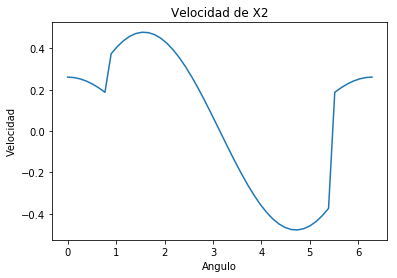

In [10]:
#PASO 6: VELOCIDAD DE X2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX2 = np.append(VX2, qp[2])

        i=i+1
      
    print ("VX2=")
    pprint.pprint(VX2)
 
    plt.plot(th,VX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY2=
array([ 2.74366197,  2.72113644,  2.65392971,  2.54314533,  2.39060238,
        2.19880562,  1.97090436,  0.61225216,  0.66966207,  0.71607609,
        0.75073211,  0.77306108,  0.78269634,  0.77947969,  0.76346394,
        0.73491208,  0.69429293,  0.64227345,  0.57970782,  0.50762335,
        0.42720368,  0.3397693 ,  0.2467559 ,  0.14969075,  0.05016768,
       -0.05017916, -0.14970205, -0.24676682, -0.33977967, -0.42721332,
       -0.50763211, -0.57971555, -0.64228004, -0.69429825, -0.73491606,
       -0.7634665 , -0.77948079, -0.78269597, -0.77305924, -0.75072884,
       -0.71607144, -0.6696561 , -0.61224498,  1.9709324 ,  2.19882973,
        2.39062216,  2.54316046,  2.65393994,  2.72114159,  2.74366197])


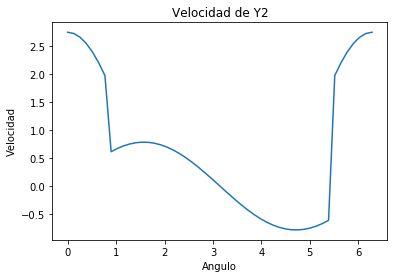

In [11]:
#PASO 7: VELOCIDAD DE Y2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY2 = np.append(VY2, qp[3])

        i=i+1
      
    print ("VY2=")
    pprint.pprint(VY2)
 
    plt.plot(th,VY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX3=
array([ 0.00666667,  0.00661193,  0.00644863,  0.00617944,  0.00580879,
        0.00534275,  0.00478899, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487, -0.12964481,
       -0.10910598, -0.08677561, -0.06302039, -0.03823037, -0.01281261,
        0.01281554,  0.03823326,  0.06302318,  0.08677826,  0.10910844,
        0.12964705,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473,  0.00478906,  0.00534281,
        0.00580884,  0.00617948,  0.00644866,  0.00661195,  0.00666667])


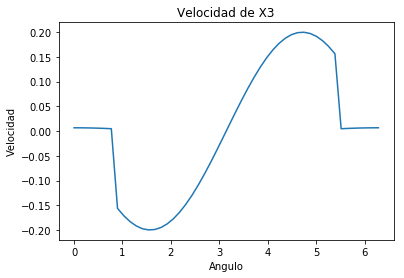

In [12]:
#PASO 8: VELOCIDAD DE X3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX3 = np.append(VX3, qp[4])

        i=i+1
      
    print ("VX3=")
    pprint.pprint(VX3)
 
    plt.plot(th,VX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X3')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY3=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962, -4.69099675, -5.13086404, -5.48648229,
       -5.75201224, -5.92309386, -5.99691799, -5.97227243, -5.84956187,
       -5.63080121, -5.31958252, -4.92101603, -4.44164621, -3.88934434,
       -3.27317925, -2.60326839, -1.89061174, -1.14691116, -0.38437823,
        0.38446621,  1.14699769,  1.89069541,  2.60334782,  3.27325313,
        3.88941147,  4.44170548,  4.92106647,  5.3196233 ,  5.63083166,
        5.84958148,  5.9722809 ,  5.99691516,  5.92307979,  5.75198715,
        5.48644661,  5.13081834,  4.69094178,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


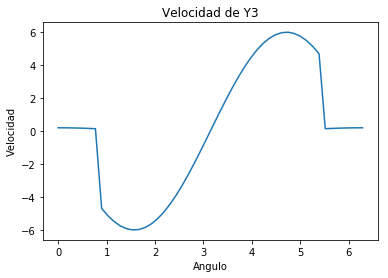

In [13]:
#PASO 9: VELOCIDAD DE Y3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY3 = np.append(VY3, qp[5])

        i=i+1
      
    print ("VY3=")
    pprint.pprint(VY3)
 
    plt.plot(th,VY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y3')

    plt.show()
    return 

grafica_velocidad (q,meca)

AX1=
array([-3.04000000e+01, -2.97703024e+01, -2.80262168e+01, -2.52913603e+01,
       -2.17620198e+01, -1.76940272e+01, -1.33856147e+01,  7.56893265e-01,
        8.34408386e-01,  8.98222480e-01,  9.47287718e-01,  9.80798444e-01,
        9.98204412e-01,  9.99219815e-01,  9.83827979e-01,  9.52281640e-01,
        9.05098789e-01,  8.43054172e-01,  7.67166564e-01,  6.78682043e-01,
        5.79053530e-01,  4.69916930e-01,  3.53064270e-01,  2.30414278e-01,
        1.03980872e-01, -2.41599044e-02, -1.51903974e-01, -2.77153774e-01,
       -3.97852695e-01, -5.12018855e-01, -6.17777640e-01, -7.13392486e-01,
       -7.97293393e-01, -8.68102703e-01, -9.24657724e-01, -9.66029819e-01,
       -9.91539658e-01, -1.00076837e+00, -9.93564411e-01, -9.70046078e-01,
       -9.30599540e-01, -8.75872513e-01, -8.06763616e-01, -1.39426486e+01,
       -1.81729931e+01, -2.21550251e+01, -2.55919269e+01, -2.82293892e+01,
       -2.98727303e+01, -3.03999941e+01])


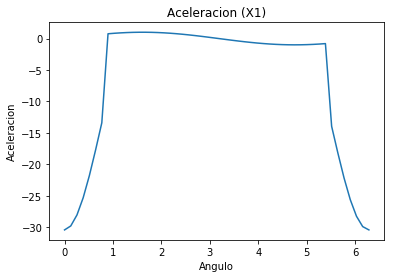

In [16]:
#PASO 10: ACELERACION DE X1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    AX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX1 = np.append(AX1, qpp[0])

        i=i+1
      
    print ("AX1=")
    pprint.pprint(AX1)	
 
    plt.plot(th,AX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)


AY1=
array([-1.        , -0.99690507, -0.97744092, -0.94192713, -0.89094686,
       -0.82533719, -0.74617545, -0.10038433, -0.1129842 , -0.12360281,
       -0.13185822, -0.13745081, -0.14017895, -0.13994945, -0.1367823 ,
       -0.13080925, -0.12226648, -0.1114816 , -0.0988561 , -0.08484406,
       -0.06992851, -0.054597  , -0.03931771, -0.0245176 , -0.01056389,
        0.00225011,  0.013714  ,  0.02370374,  0.0321795 ,  0.03917819,
        0.04480132,  0.04919921,  0.0525526 ,  0.05505319,  0.0568843 ,
        0.05820323,  0.05912639,  0.05971837,  0.05998566,  0.05987549,
        0.05927983,  0.05804442,  0.05598193, -0.69053139, -0.77749751,
       -0.85169709, -0.91191176, -0.9571528 , -0.98667734, -1.00000059])


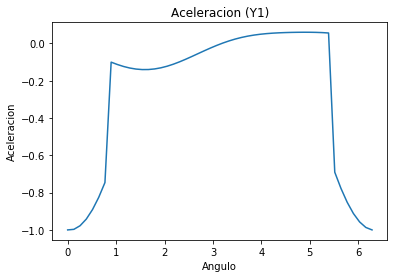

In [17]:
#PASO 11: ACELERACION DE Y1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY1 = np.append(AY1, qpp[1])

        i=i+1
      
    print ("AY1=")
    pprint.pprint(AY1)	
 
    plt.plot(th,AY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX2=
array([ 4.67700826,  4.58166587,  4.31565144,  3.89824819,  3.35996425,
        2.74032607,  2.08503383, -1.51547343, -1.64325437, -1.74557842,
       -1.82320332, -1.87677618, -1.90670123, -1.91305217, -1.89553533,
       -1.85350644, -1.78603997, -1.69204641, -1.57042939, -1.42027168,
       -1.24103657, -1.0327699 , -0.79628719, -0.53333076, -0.24668302,
        0.05977536,  0.38107077,  0.71120978,  1.04332011,  1.36985505,
        1.68285235,  1.97423494,  2.23613734,  2.46123952,  2.64308883,
        2.77639101,  2.85725259,  2.88335986,  2.85408364,  2.77050307,
        2.63534749,  2.45285987,  2.22859067,  2.15774655,  2.80284953,
        3.41126755,  3.9374851 ,  4.34217453,  4.59503739,  4.6770075 ])


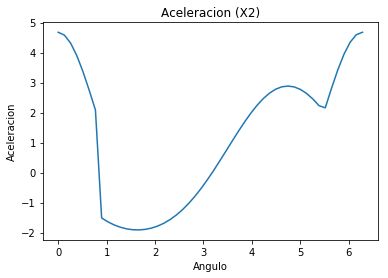

In [18]:
#PASO 12: ACELERACION DE X2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX2 = np.append(AX2, qpp[2])

        i=i+1
      
    print ("AX2=")
    pprint.pprint(AX2)	
 
    plt.plot(th,AX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY2=
array([45.18987583, 44.25345396, 41.65012504, 37.56964051, 32.31212256,
       26.2663035 , 19.88147937, -2.58480887, -2.8164778 , -3.00404663,
       -3.14722896, -3.2458304 , -3.29965188, -3.30842949, -3.2718117 ,
       -3.18937418, -3.06067198, -2.88532852, -2.6631598 , -2.39433066,
       -2.07953731, -1.72020738, -1.31870484, -0.87852404, -0.40445411,
        0.09730624,  0.619103  ,  1.15186703,  1.68525195,  2.20787471,
        2.70765501,  3.17224104,  3.58949973,  3.94804244,  4.23775124,
        4.45026896,  4.57941675,  4.62150737,  4.57553007,  4.44319267,
        4.22881768,  3.93910134,  3.58275467, 20.64568916, 26.92341829,
       32.8513106 , 37.98201046, 41.92887471, 44.39398424, 45.18986775])


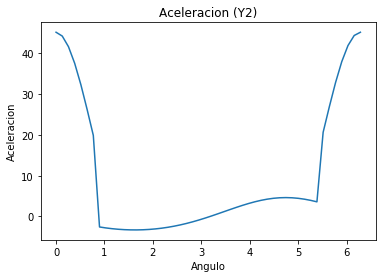

In [20]:
#PASO 13: ACELERACION DE Y2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY2 = np.append(AY2, qpp[3])

        i=i+1
      
    print ("AY2=")
    pprint.pprint(AY2)	
 
    plt.plot(th,AY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX3=
array([-0.04668148, -0.04636004, -0.04507068, -0.04286595, -0.03983208,
       -0.03608425, -0.03176048,  0.75689326,  0.83440839,  0.89822248,
        0.94728772,  0.98079844,  0.99820441,  0.99921981,  0.98382798,
        0.95228164,  0.90509879,  0.84305417,  0.76716656,  0.67868204,
        0.57905353,  0.46991693,  0.35306427,  0.23041428,  0.10398087,
       -0.0241599 , -0.15190397, -0.27715377, -0.39785269, -0.51201885,
       -0.61777764, -0.71339249, -0.79729339, -0.8681027 , -0.92465772,
       -0.96602982, -0.99153966, -1.00076837, -0.99356441, -0.97004608,
       -0.93059954, -0.87587251, -0.80676362, -0.02990587, -0.03448978,
       -0.03852392, -0.04186558, -0.04439451, -0.04601916, -0.0466815 ])


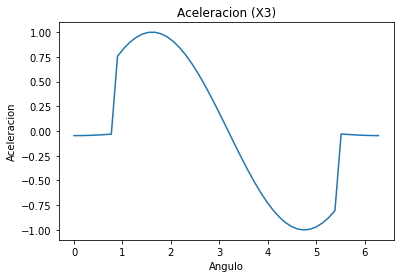

In [21]:
#PASO 14: ACELERACION DE X3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX3 = np.append(AX3, qpp[4])

        i=i+1
      
    print ("AX3=")
    pprint.pprint(AX3)	
 
    plt.plot(th,AX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY3=
array([ -1.        ,  -0.99690507,  -0.97744092,  -0.94192713,
        -0.89094686,  -0.82533719,  -0.74617545, 243.00580774,
       288.58241797, 328.29601483, 359.64269757, 380.64417352,
       389.97597522, 387.05328598, 372.06877292, 345.9799601 ,
       310.44696768, 267.72468386, 220.51640996, 171.79853326,
       124.62767112,  81.94287131,  46.37577147,  20.08109595,
         4.59853404,   0.75498788,   8.61353552,  27.47239732,
        55.91392261,  91.90034167, 132.90997018, 176.10490929,
       218.51922638, 257.25526597, 289.67521174, 313.57533648,
       327.33151399, 330.00645253, 321.41161924, 302.11979491,
       273.42743419, 237.26929618, 196.09093878,  -0.69053139,
        -0.77749751,  -0.85169709,  -0.91191176,  -0.9571528 ,
        -0.98667734,  -1.00000059])


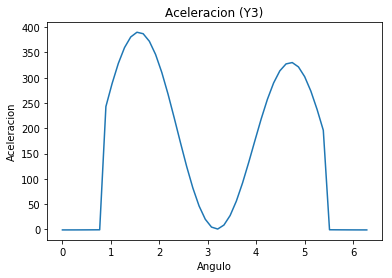

In [22]:
#PASO 15: ACELERACION DE Y3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY3 = np.append(AY3, qpp[5])

        i=i+1
      
    print ("AY3=")
    pprint.pprint(AY3)	
 
    plt.plot(th,AY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)